### Real time face detection and face recognition in Python

Pre-requisites - installing dlib and face_recognition package for python

In [2]:
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import dlib
dlib.DLIB_USE_CUDA
import cv2
import numpy as np

In [6]:
# Utility function to display images
def show_image(img, fig_size = None):
    print(img.shape)
    img = img.astype('uint8')
    
    if fig_size is not None:
        plt.figure(figsize=fig_size)
    
    plt.imshow(img)
    plt.show()

#### Check face detection on a static image

In [7]:
# Load a sample picture and learn how to recognize it.
sample_image = face_recognition.load_image_file("data/me2.jpeg")
face_locations = face_recognition.face_locations(sample_image)
print(len(face_locations))

In [ ]:
# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

A face is located at pixel location Top: 376, Left: 247, Bottom: 761, Right: 632
(385, 385, 3)


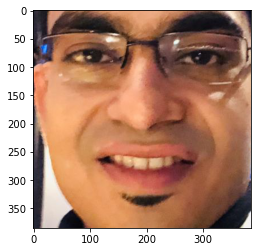

In [10]:
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = sample_image[top:bottom, left:right]
    show_image(face_image)

In [11]:
known_encoding = face_recognition.face_encodings(sample_image)[0]

In [12]:
known_face_encodings = [
    known_encoding
]

known_face_names = [
    "Aditya",
]

In [13]:
# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

### Face Recogition in Real-Time Webcam

In [14]:
while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)
    
    try : 
        # Hit 'q' on the keyboard to quit!
        if cv2.waitKey(1) & 0xFF == ord('q'):
            # Release handle to the webcam
            video_capture.release()
            cv2.destroyAllWindows()            
            break
    except:
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()